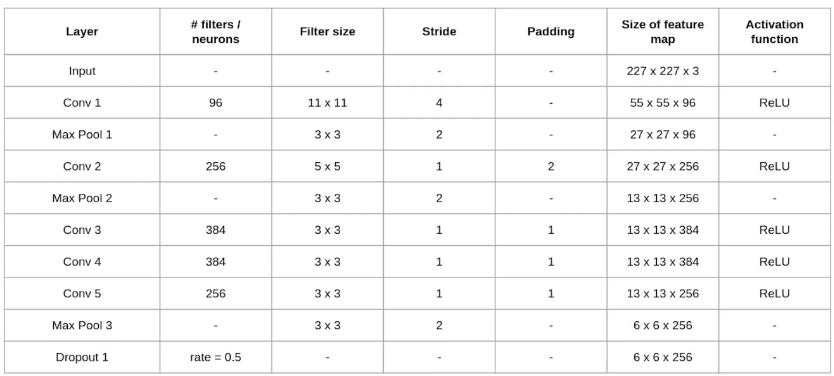

In [75]:
import torch
import torch.nn as nn
import numpy as np
import torchvision #use for computer vision. It has also include dataset, model and image transformation.
import torchvision.transforms as transforms
from torchvision import datasets
from torchsummary import summary #provides a summary of a PyTorch model's architecture

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [43]:
#Hyper parameter- a hyperparameter that you can tune.
batch_size = 64# The batch size is the number of training examples utilized in one iteration. 
num_classes = 10 #num_classes is used to determine the number of output neurons in the final fully connected layer 
learning_rate = 0.001 #It's a scalar value that determines the size of the steps taken during optimization. 
num_epochs = 3 #he num_epochs variable typically represents the number of times the learning algorithm will work through the entire training dataset.

# Data load

In [44]:
transform = transforms.Compose([transforms.Resize((227,227)),transforms.ToTensor()])

In [45]:
train_dataset = datasets.CIFAR10(
        root='./data', train=True,
        download=True, transform=transform,
    )


Files already downloaded and verified


In [46]:
test_dataset = datasets.CIFAR10(
        root='./data', train=False,
        download=True, transform=transform,
    )

Files already downloaded and verified


In [47]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [48]:
len(train_loader)

782

In [49]:
for X, y in train_loader:
  print(X.shape)
  break

torch.Size([64, 3, 227, 227])


# Model

In [50]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1= nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0), #[1, 96, 55, 55]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2), #[1, 96, 27, 27]
        )
        self.conv2= nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), #[1, 256, 27, 27]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2), #[1, 256, 13, 13]
        )
        self.conv3= nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), #[1, 384, 13, 13]
            nn.ReLU(),
        )
        self.conv4= nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1), #[1, 384, 13, 13]
            nn.ReLU(),
        )
        self.conv5= nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1), #[1, 256, 13, 13]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2), #[1, 256, 6, 6]
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*6*6, 4096),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU()
        )
        self.fc3= nn.Sequential(
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x= self.conv1(x)
        x= self.conv2(x)
        x= self.conv3(x)
        x= self.conv4(x)
        x= self.conv5(x)
        x= x.reshape(x.shape[0], -1) #[1, 9216]
        x= self.fc1(x)
        x= self.fc2(x)
        x= self.fc3(x)
        return x

In [51]:
model = AlexNet().to(device)
model

AlexNet(
  (conv1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
  )
  (fc2): Sequ

In [52]:
summary(model,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
          Dropout-14                 [-

# Dimension testing

In [53]:
x= torch.randn(1,3,227,227)
m= nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
x=m(x)
x.shape

torch.Size([1, 96, 55, 55])

In [54]:
m= nn.MaxPool2d(kernel_size = 3, stride = 2)
x=m(x)
x.shape

torch.Size([1, 96, 27, 27])

In [55]:
m=  nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
x=m(x)
x.shape

torch.Size([1, 256, 27, 27])

In [56]:
m= nn.MaxPool2d(kernel_size = 3, stride = 2)
x=m(x)
x.shape

torch.Size([1, 256, 13, 13])

In [57]:
m=  nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
x=m(x)
x.shape

torch.Size([1, 384, 13, 13])

In [58]:
m=  nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
x=m(x)
x.shape

torch.Size([1, 384, 13, 13])

In [59]:
m=   nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
x=m(x)
x.shape

torch.Size([1, 256, 13, 13])

In [60]:
m= nn.MaxPool2d(kernel_size = 3, stride = 2)
x=m(x)
x.shape

torch.Size([1, 256, 6, 6])

In [61]:
x= x.reshape(x.shape[0], -1)

In [62]:
x.shape

torch.Size([1, 9216])

In [63]:
m=   nn.Linear(256*6*6, 4096)
x=m(x)
x.shape

torch.Size([1, 4096])

In [64]:
m=   nn.Linear(4096, 4096)
x=m(x)
x.shape

torch.Size([1, 4096])

In [65]:
m=   nn.Linear(4096,10)
x=m(x)
x.shape

torch.Size([1, 10])

In [66]:
x

tensor([[-0.0114,  0.0525, -0.0117, -0.0006,  0.0105,  0.0349,  0.0097,  0.0089,
         -0.0318,  0.0085]], grad_fn=<AddmmBackward0>)

In [68]:
x= torch.randn(64,3,227,227)
x=model(x)
x.shape

torch.Size([64, 10])

# Training

In [69]:
loss_fn = nn.CrossEntropyLoss() #mulitclass 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [72]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/3], Step [1/782], Loss: 2.3227
Epoch [1/3], Step [101/782], Loss: 2.1800
Epoch [1/3], Step [201/782], Loss: 1.9033
Epoch [1/3], Step [301/782], Loss: 1.8003
Epoch [1/3], Step [401/782], Loss: 1.9545
Epoch [1/3], Step [501/782], Loss: 1.7830
Epoch [1/3], Step [601/782], Loss: 1.7788
Epoch [1/3], Step [701/782], Loss: 1.8048
Epoch [2/3], Step [1/782], Loss: 1.6042
Epoch [2/3], Step [101/782], Loss: 1.5535
Epoch [2/3], Step [201/782], Loss: 1.6571
Epoch [2/3], Step [301/782], Loss: 1.4779
Epoch [2/3], Step [401/782], Loss: 1.2685
Epoch [2/3], Step [501/782], Loss: 1.4776
Epoch [2/3], Step [601/782], Loss: 1.2923
Epoch [2/3], Step [701/782], Loss: 1.2062
Epoch [3/3], Step [1/782], Loss: 1.2455
Epoch [3/3], Step [101/782], Loss: 1.4894
Epoch [3/3], Step [201/782], Loss: 1.3390
Epoch [3/3], Step [301/782], Loss: 1.4475
Epoch [3/3], Step [401/782], Loss: 1.2562
Epoch [3/3], Step [501/782], Loss: 1.2867
Epoch [3/3], Step [601/782], Loss: 1.1591
Epoch [3/3], Step [701/782], Loss: 1.195

# Accuracy

In [73]:
true_labels = [] #for confusion matrix
predicted_labels = [] #for confusion matrix

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())
                                
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy= 100 * correct / total
    print('Accuracy of the network on the 10000 test images: {} %'.format(accuracy))
    top1_error = 100 - accuracy
    print('Top-1 Error: {} %'.format(top1_error))


Accuracy of the network on the 10000 test images: 56.34 %
Top-1 Error: 43.66 %


In [76]:
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
confusion = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(num_classes, num_classes))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion_matrix' is not defined

In [ ]:
report = classification_report(true_labels, predicted_labels)
print('\n'+ report)